In [49]:
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
import sklearn
import seaborn as sns

data= pd.read_csv('~/Downloads/loan1.csv')
data.head()

,Loan_Status,Acc_Open_Past_24Mths,All_Util,Annual_Inc,Avg_Cur_Bal,Bc_Open_To_Buy,Dti,Funded_Amnt,Funded_Amnt_Inv,Grade,...,Total_Acc,Total_Bal_Ex_Mort,Total_Bal_Il,Total_Bc_Limit,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Int,Total_Rec_Prncp,Total_Rev_Hi_Lim
0,1,1,24.0,80000.0,11395.0,12250.0,5.16,5000,5000.0,1,...,25,11501,3342.0,24500,6000,5090.966136,5090.97,90.97,5000.00,33500
1,1,2,53.0,53000.0,11341.0,5500.0,16.53,10000,10000.0,1,...,22,15903,8250.0,22000,18133,10398.051810,10398.05,398.05,10000.00,37250
2,1,3,45.0,65000.0,12482.0,26289.0,23.60,11200,11200.0,1,...,27,78795,69959.0,34900,114578,696.260000,696.26,143.36,552.90,53100
3,1,2,9.0,83000.0,25571.0,5667.0,27.73,10000,9975.0,1,...,19,78839,76525.0,17000,115548,10008.428580,9983.41,8.43,10000.00,25300
4,1,8,5.0,45000.0,970.0,2732.0,12.45,5000,5000.0,1,...,19,15525,13521.0,30050,15498,1563.690000,1563.69,291.96,1271.73,37650


In [50]:
data.describe()

,Loan_Status,Acc_Open_Past_24Mths,All_Util,Annual_Inc,Avg_Cur_Bal,Bc_Open_To_Buy,Dti,Funded_Amnt,Funded_Amnt_Inv,Grade,...,Total_Acc,Total_Bal_Ex_Mort,Total_Bal_Il,Total_Bc_Limit,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Int,Total_Rec_Prncp,Total_Rev_Hi_Lim
count,1.048575e+06,1.048575e+06,887285.000000,1.041949e+06,1.048538e+06,1.036422e+06,1.047699e+06,1.048575e+06,1.048565e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,8.874270e+05,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.902930e-01,4.599519e+00,56.971315,7.907038e+04,1.337514e+04,1.234902e+04,1.898022e+01,1.478616e+04,1.478048e+04,2.530490e+00,...,2.372825e+01,5.136541e+04,3.517524e+04,2.389971e+04,4.447798e+04,9.790558e+03,9.786000e+03,1.845598e+03,7.846949e+03,3.547711e+04
std,3.125243e-01,3.252603e+00,20.880500,8.327007e+04,1.651389e+04,1.740403e+04,1.436956e+01,9.347754e+03,9.345930e+03,1.215342e+00,...,1.209095e+01,5.105769e+04,4.394040e+04,2.381126e+04,4.597583e+04,9.192969e+03,9.188752e+03,2.149785e+03,7.982825e+03,3.718226e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+03,7.250000e+02,1.000000e+00,...,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,43.000000,4.628000e+04,3.000000e+03,2.020000e+03,1.184000e+01,7.800000e+03,7.775000e+03,2.000000e+00,...,1.500000e+01,2.049400e+04,8.503500e+03,8.500000e+03,1.500000e+04,2.794020e+03,2.793780e+03,5.177900e+02,1.840900e+03,1.480000e+04
50%,1.000000e+00,4.000000e+00,58.000000,6.500000e+04,7.098000e+03,6.167000e+03,1.789000e+01,1.200000e+04,1.200000e+04,2.000000e+00,...,2.200000e+01,3.777300e+04,2.285900e+04,1.680000e+04,3.314900e+04,6.825870e+03,6.822810e+03,1.124690e+03,5.000000e+03,2.600000e+04
75%,1.000000e+00,6.000000e+00,72.000000,9.500000e+04,1.844000e+04,1.558500e+04,2.479000e+01,2.000000e+04,2.000000e+04,3.000000e+00,...,3.000000e+01,6.495800e+04,4.565250e+04,3.120000e+04,5.979850e+04,1.372506e+04,1.371582e+04,2.326425e+03,1.100000e+04,4.440000e+04
max,1.000000e+00,6.100000e+01,239.000000,9.930475e+06,7.529940e+05,7.111400e+05,9.990000e+02,4.000000e+04,4.000000e+04,7.000000e+00,...,1.760000e+02,2.921551e+06,1.837038e+06,1.569000e+06,2.118996e+06,5.980826e+04,5.980826e+04,2.694866e+04,4.000000e+04,9.999999e+06


In [51]:
print(list(data.columns))

['Loan_Status', 'Acc_Open_Past_24Mths', 'All_Util', 'Annual_Inc', 'Avg_Cur_Bal', 'Bc_Open_To_Buy', 'Dti', 'Funded_Amnt', 'Funded_Amnt_Inv', 'Grade', 'Installment', 'Int_Rate', 'Last_Pymnt_Amnt', 'Loan_Amnt', 'Max_Bal_Bc', 'Mo_Sin_Old_Rev_Tl_Op', 'Out_Prncp', 'Out_Prncp_Inv', 'Pct_Tl_Nvr_Dlq', 'Percent_Bc_Gt_75', 'Revol_Bal', 'Revol_Util', 'Sub_Grade', 'Term', 'Tot_Cur_Bal', 'Tot_Hi_Cred_Lim', 'Total_Acc', 'Total_Bal_Ex_Mort', 'Total_Bal_Il', 'Total_Bc_Limit', 'Total_Il_High_Credit_Limit', 'Total_Pymnt', 'Total_Pymnt_Inv', 'Total_Rec_Int', 'Total_Rec_Prncp', 'Total_Rev_Hi_Lim']


In [52]:
data.Loan_Status.value_counts()

1    933539
0    115036
Name: Loan_Status, dtype: int64

In [53]:
data.dropna()

,Loan_Status,Acc_Open_Past_24Mths,All_Util,Annual_Inc,Avg_Cur_Bal,Bc_Open_To_Buy,Dti,Funded_Amnt,Funded_Amnt_Inv,Grade,...,Total_Acc,Total_Bal_Ex_Mort,Total_Bal_Il,Total_Bc_Limit,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Int,Total_Rec_Prncp,Total_Rev_Hi_Lim
0,1,1,24.0,80000.0,11395.0,12250.0,5.16,5000,5000.0,1,...,25,11501,3342.0,24500,6000,5090.966136,5090.97,90.97,5000.00,33500
1,1,2,53.0,53000.0,11341.0,5500.0,16.53,10000,10000.0,1,...,22,15903,8250.0,22000,18133,10398.051810,10398.05,398.05,10000.00,37250
2,1,3,45.0,65000.0,12482.0,26289.0,23.60,11200,11200.0,1,...,27,78795,69959.0,34900,114578,696.260000,696.26,143.36,552.90,53100
3,1,2,9.0,83000.0,25571.0,5667.0,27.73,10000,9975.0,1,...,19,78839,76525.0,17000,115548,10008.428580,9983.41,8.43,10000.00,25300
4,1,8,5.0,45000.0,970.0,2732.0,12.45,5000,5000.0,1,...,19,15525,13521.0,30050,15498,1563.690000,1563.69,291.96,1271.73,37650
5,1,3,55.0,85000.0,9017.0,3119.0,19.33,20000,19975.0,1,...,39,43945,0.0,40550,0,6198.440000,6190.69,1075.75,5122.69,60450
6,1,8,3.0,125000.0,17779.0,7625.0,15.88,5000,5000.0,1,...,40,67280,66194.0,30500,94186,1408.870000,1408.87,268.12,1140.75,35600
7,1,1,38.0,93900.0,59290.0,8467.0,9.99,12500,12500.0,1,...,15,54311,44574.0,25400,42000,4574.000000,4574.00,652.40,3921.60,25400
8,0,11,69.0,125000.0,33002.0,20476.0,10.94,18000,18000.0,1,...,26,82105,81281.0,21300,89997,13527.530000,13527.53,2011.18,11516.35,29400
9,1,3,36.0,43000.0,6719.0,52361.0,6.06,6000,6000.0,1,...,39,32816,28977.0,56200,33236,6637.907621,6637.91,637.91,6000.00,57200


In [54]:
from sklearn.utils import resample
df=resample(data,n_samples=5000)
df.head(20)

,Loan_Status,Acc_Open_Past_24Mths,All_Util,Annual_Inc,Avg_Cur_Bal,Bc_Open_To_Buy,Dti,Funded_Amnt,Funded_Amnt_Inv,Grade,...,Total_Acc,Total_Bal_Ex_Mort,Total_Bal_Il,Total_Bc_Limit,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Int,Total_Rec_Prncp,Total_Rev_Hi_Lim
592711,1,6,66.0,60000.0,42832.0,2978.0,11.50,16000,16000.0,3,...,20,27462,22440.0,8000,24568,1074.810000,1074.81,345.45,729.36,17000
232327,1,1,NaN,65000.0,3591.0,5103.0,16.21,12000,12000.0,1,...,17,32320,NaN,17900,41046,12873.400000,12873.40,873.40,12000.00,20700
162344,1,6,16.0,70000.0,1882.0,91993.0,17.61,20000,20000.0,1,...,25,24466,13659.0,102800,39961,20533.647890,20533.65,533.65,20000.00,114000
602113,1,5,68.0,14000.0,2493.0,8588.0,6.09,2200,2200.0,3,...,13,29912,27500.0,11000,27500,2524.126220,2524.13,324.13,2200.00,16400
479092,1,2,45.0,137800.0,21070.0,32629.0,11.29,24000,24000.0,2,...,24,41860,26864.0,46900,36880,13302.810000,13302.81,3590.06,9712.75,55800
318175,1,7,47.0,78000.0,4227.0,31547.0,27.98,20000,20000.0,2,...,24,71864,36401.0,62600,49652,7029.630000,7029.63,1504.67,5524.96,74600
545536,1,3,NaN,101000.0,14546.0,1221.0,17.59,18000,18000.0,2,...,21,44612,NaN,7300,60653,21087.557040,21087.56,3087.56,18000.00,7300
896088,1,6,55.0,15000.0,20866.0,1480.0,20.31,24000,24000.0,4,...,21,9876,0.0,6500,0,1305.480000,1305.48,860.09,445.39,18100
574201,1,6,65.0,45000.0,10335.0,7496.0,39.25,10000,10000.0,3,...,15,48597,38779.0,15100,49789,10487.909740,10487.91,487.91,10000.00,25500
224412,1,7,NaN,70000.0,42309.0,6858.0,13.49,8000,8000.0,1,...,16,38620,NaN,13300,42058,8759.503902,8759.50,759.50,8000.00,19800


In [55]:
datanullsum=df.isnull().sum()
datanullsum

Loan_Status                     0
Acc_Open_Past_24Mths            0
All_Util                      784
Annual_Inc                     44
Avg_Cur_Bal                     0
Bc_Open_To_Buy                 54
Dti                             9
Funded_Amnt                     0
Funded_Amnt_Inv                 0
Grade                           0
Installment                     0
Int_Rate                        0
Last_Pymnt_Amnt                 0
Loan_Amnt                       0
Max_Bal_Bc                    784
Mo_Sin_Old_Rev_Tl_Op            0
Out_Prncp                       0
Out_Prncp_Inv                   0
Pct_Tl_Nvr_Dlq                  0
Percent_Bc_Gt_75               55
Revol_Bal                       0
Revol_Util                      7
Sub_Grade                       0
Term                            0
Tot_Cur_Bal                     0
Tot_Hi_Cred_Lim                 0
Total_Acc                       0
Total_Bal_Ex_Mort               0
Total_Bal_Il                  784
Total_Bc_Limit

In [56]:
df2=df.fillna("0")

In [57]:
data_prior_nullsum=df2.isnull().sum()
data_prior_nullsum

Loan_Status                   0
Acc_Open_Past_24Mths          0
All_Util                      0
Annual_Inc                    0
Avg_Cur_Bal                   0
Bc_Open_To_Buy                0
Dti                           0
Funded_Amnt                   0
Funded_Amnt_Inv               0
Grade                         0
Installment                   0
Int_Rate                      0
Last_Pymnt_Amnt               0
Loan_Amnt                     0
Max_Bal_Bc                    0
Mo_Sin_Old_Rev_Tl_Op          0
Out_Prncp                     0
Out_Prncp_Inv                 0
Pct_Tl_Nvr_Dlq                0
Percent_Bc_Gt_75              0
Revol_Bal                     0
Revol_Util                    0
Sub_Grade                     0
Term                          0
Tot_Cur_Bal                   0
Tot_Hi_Cred_Lim               0
Total_Acc                     0
Total_Bal_Ex_Mort             0
Total_Bal_Il                  0
Total_Bc_Limit                0
Total_Il_High_Credit_Limit    0
Total_Py

In [58]:
df2.head()

,Loan_Status,Acc_Open_Past_24Mths,All_Util,Annual_Inc,Avg_Cur_Bal,Bc_Open_To_Buy,Dti,Funded_Amnt,Funded_Amnt_Inv,Grade,...,Total_Acc,Total_Bal_Ex_Mort,Total_Bal_Il,Total_Bc_Limit,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Int,Total_Rec_Prncp,Total_Rev_Hi_Lim
592711,1,6,66,60000,42832.0,2978,11.5,16000,16000.0,3,...,20,27462,22440,8000,24568,1074.81000,1074.81,345.45,729.36,17000
232327,1,1,0,65000,3591.0,5103,16.21,12000,12000.0,1,...,17,32320,0,17900,41046,12873.40000,12873.40,873.40,12000.00,20700
162344,1,6,16,70000,1882.0,91993,17.61,20000,20000.0,1,...,25,24466,13659,102800,39961,20533.64789,20533.65,533.65,20000.00,114000
602113,1,5,68,14000,2493.0,8588,6.09,2200,2200.0,3,...,13,29912,27500,11000,27500,2524.12622,2524.13,324.13,2200.00,16400
479092,1,2,45,137800,21070.0,32629,11.29,24000,24000.0,2,...,24,41860,26864,46900,36880,13302.81000,13302.81,3590.06,9712.75,55800


In [59]:
print(list(df2.columns))

['Loan_Status', 'Acc_Open_Past_24Mths', 'All_Util', 'Annual_Inc', 'Avg_Cur_Bal', 'Bc_Open_To_Buy', 'Dti', 'Funded_Amnt', 'Funded_Amnt_Inv', 'Grade', 'Installment', 'Int_Rate', 'Last_Pymnt_Amnt', 'Loan_Amnt', 'Max_Bal_Bc', 'Mo_Sin_Old_Rev_Tl_Op', 'Out_Prncp', 'Out_Prncp_Inv', 'Pct_Tl_Nvr_Dlq', 'Percent_Bc_Gt_75', 'Revol_Bal', 'Revol_Util', 'Sub_Grade', 'Term', 'Tot_Cur_Bal', 'Tot_Hi_Cred_Lim', 'Total_Acc', 'Total_Bal_Ex_Mort', 'Total_Bal_Il', 'Total_Bc_Limit', 'Total_Il_High_Credit_Limit', 'Total_Pymnt', 'Total_Pymnt_Inv', 'Total_Rec_Int', 'Total_Rec_Prncp', 'Total_Rev_Hi_Lim']


In [176]:
df.describe()

,Loan_Status,Acc_Open_Past_24Mths,All_Util,Annual_Inc,Avg_Cur_Bal,Bc_Open_To_Buy,Dti,Funded_Amnt,Funded_Amnt_Inv,Grade,...,Total_Acc,Total_Bal_Ex_Mort,Total_Bal_Il,Total_Bc_Limit,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Pymnt_Inv,Total_Rec_Int,Total_Rec_Prncp,Total_Rev_Hi_Lim
count,5000.000000,5000.000000,4216.000000,4.956000e+03,5000.000000,4946.000000,4991.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,4216.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.886600,4.534800,56.748102,7.943830e+04,13280.702400,12199.822887,19.005700,14758.520000,14752.225000,2.531400,...,23.605000,51240.071800,35651.953273,23612.16340,44717.663600,9778.782182,9773.570466,1852.150356,7833.708796,34663.391600
std,0.317113,3.181826,20.921117,1.196619e+05,16121.850318,17152.065700,18.329072,9383.695363,9382.737598,1.206858,...,12.011354,50152.693764,43844.712519,22956.01127,45426.664529,9202.937149,9198.774634,2129.038665,8011.369432,32717.783391
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.000000,750.000000,1.000000,...,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,43.000000,4.700000e+04,2954.750000,2049.500000,11.755000,7200.000000,7200.000000,2.000000,...,15.000000,20672.250000,8620.750000,8300.00000,15000.000000,2862.587500,2862.587500,524.652500,1890.917500,14900.000000
50%,1.000000,4.000000,58.000000,6.500000e+04,6994.500000,6025.500000,17.750000,12000.000000,12000.000000,2.000000,...,22.000000,37941.000000,23252.500000,16500.00000,33671.500000,6666.794835,6654.590000,1117.330000,5000.000000,25900.000000
75%,1.000000,6.000000,72.000000,9.500000e+04,18339.000000,14936.500000,24.475000,20000.000000,20000.000000,3.000000,...,30.000000,64815.000000,47121.750000,31100.00000,60651.500000,13759.388465,13759.387500,2372.732500,11000.000000,43700.000000
max,1.000000,26.000000,129.000000,7.600000e+06,235434.000000,175120.000000,999.000000,40000.000000,40000.000000,7.000000,...,140.000000,698997.000000,482890.000000,199600.00000,524049.000000,56109.340000,56109.340000,21109.340000,40000.000000,543600.000000


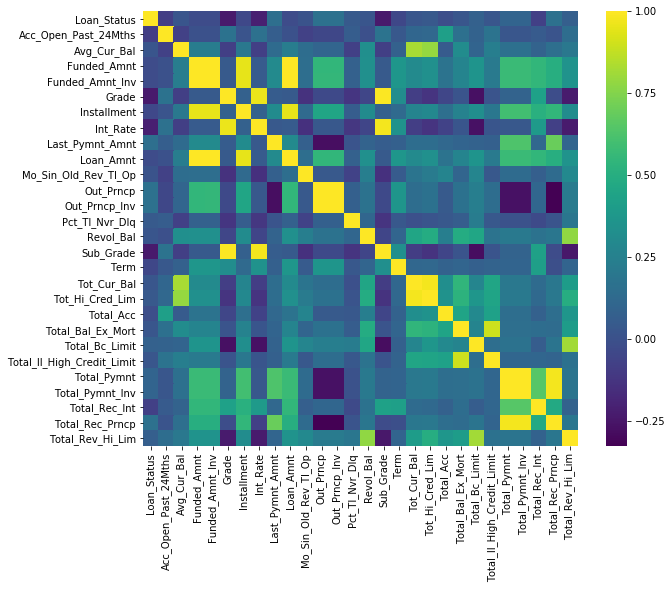

In [60]:
f,ax=plt.subplots(figsize=(10,8))
corr_data=df2.corr()
sns.heatmap(corr_data, mask=np.zeros_like(corr_data, dtype=np.bool), cmap='viridis',
square=True, ax=ax)
plt.show()

<Figure size 1080x1080 with 0 Axes>

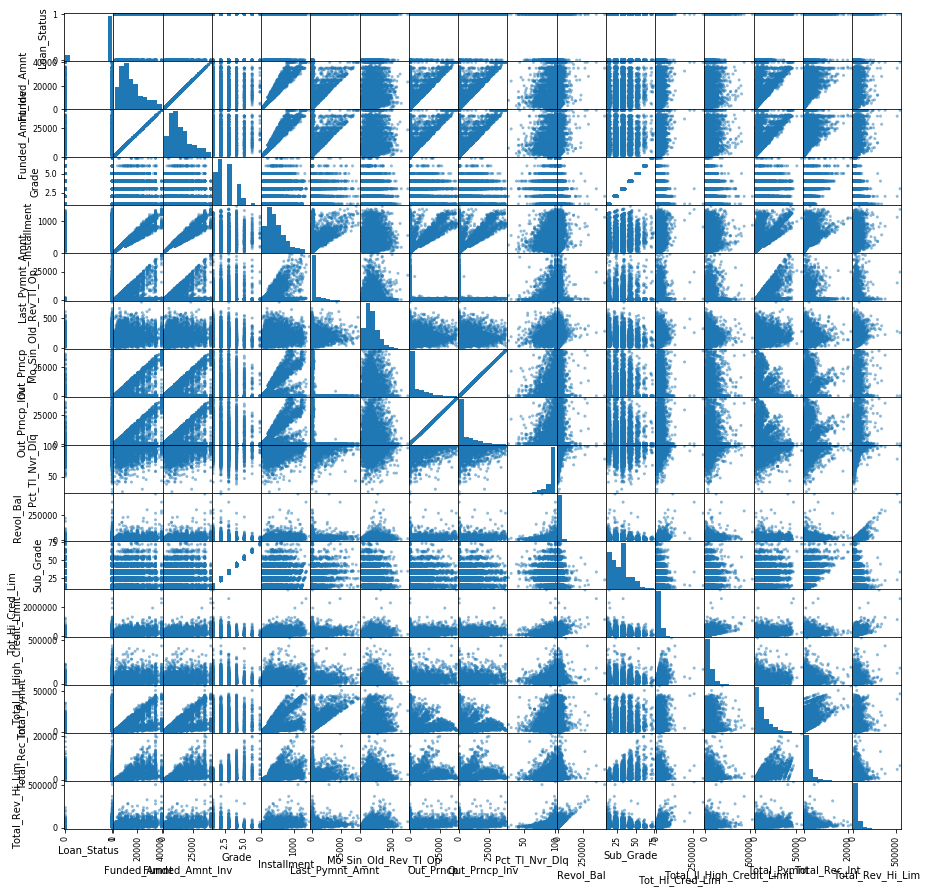

In [182]:
#In scatter plot, we can see there are some feature are correlated with each other. 
from pandas.plotting import scatter_matrix
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
plt.figure()
scatter_matrix(df3)
plt.show()

In [61]:
corr_data['Loan_Status'].sort_values(ascending = False)

Loan_Status                   1.000000
Total_Rec_Prncp               0.164936
Out_Prncp                     0.164252
Out_Prncp_Inv                 0.164209
Last_Pymnt_Amnt               0.153434
Total_Pymnt_Inv               0.098021
Total_Pymnt                   0.097993
Total_Bc_Limit                0.078977
Total_Rev_Hi_Lim              0.069626
Pct_Tl_Nvr_Dlq                0.043467
Tot_Hi_Cred_Lim               0.036792
Total_Bal_Ex_Mort             0.031257
Total_Il_High_Credit_Limit    0.029556
Tot_Cur_Bal                   0.027256
Revol_Bal                     0.025034
Avg_Cur_Bal                   0.024523
Mo_Sin_Old_Rev_Tl_Op          0.013091
Total_Acc                    -0.014808
Funded_Amnt_Inv              -0.021606
Loan_Amnt                    -0.021708
Funded_Amnt                  -0.021708
Installment                  -0.040444
Term                         -0.045426
Total_Rec_Int                -0.076000
Acc_Open_Past_24Mths         -0.083420
Int_Rate                 

In [76]:
array = df2.values
X1 = array[:,1:36]
Y1 = array[:,0:1]

In [77]:
Y1

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=object)

In [78]:
X1

array([[6, 66.0, 60000.0, ..., 345.45, 729.36, 17000],
       [1, '0', 65000.0, ..., 873.4, 12000.0, 20700],
       [6, 16.0, 70000.0, ..., 533.65, 20000.0, 114000],
       ...,
       [2, 52.0, 36000.0, ..., 2930.86, 3315.63, 62400],
       [0, '0', '0', ..., 585.34, 3000.0, 10500],
       [3, '0', 72000.0, ..., 485.98, 4700.0, 12700]], dtype=object)

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
NUM_FEATURES = 19
model = LinearRegression()
rfe = RFE(model, NUM_FEATURES)
fit = rfe.fit(X1, Y1)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
print(sorted(zip(map (lambda x: round(x,4),fit.ranking_),list(df2.columns.values))))

Num Features: 19
Selected Features: [ True False False False False  True  True  True  True  True  True False
  True False False  True  True  True  True False  True  True  True False
 False  True False False False False  True  True False  True False]
Feature Ranking: [ 1  3 17 12  8  1  1  1  1  1  1  5  1 10  2  1  1  1  1  7  1  1  1 14
 13  1 16 15 11  9  1  1  4  1  6]
[(1, 'Bc_Open_To_Buy'), (1, 'Dti'), (1, 'Funded_Amnt'), (1, 'Funded_Amnt_Inv'), (1, 'Grade'), (1, 'Installment'), (1, 'Last_Pymnt_Amnt'), (1, 'Loan_Status'), (1, 'Mo_Sin_Old_Rev_Tl_Op'), (1, 'Out_Prncp'), (1, 'Out_Prncp_Inv'), (1, 'Pct_Tl_Nvr_Dlq'), (1, 'Revol_Bal'), (1, 'Revol_Util'), (1, 'Sub_Grade'), (1, 'Tot_Hi_Cred_Lim'), (1, 'Total_Il_High_Credit_Limit'), (1, 'Total_Pymnt'), (1, 'Total_Rec_Int'), (2, 'Max_Bal_Bc'), (3, 'Acc_Open_Past_24Mths'), (4, 'Total_Pymnt_Inv'), (5, 'Int_Rate'), (6, 'Total_Rec_Prncp'), (7, 'Percent_Bc_Gt_75'), (8, 'Avg_Cur_Bal'), (9, 'Total_Bc_Limit'), (10, 'Loan_Amnt'), (11, 'Total_Bal_Il'

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#number features=19, score=0.55


In [175]:
score = rfe.score(X1, Y1)
print("Model Score with selected features is:", score)

Model Score with selected features is: 0.5497812925326706


In [166]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


skb = SelectKBest(f_classif,k='all').fit(df2,df2['Loan_Status'])
scores = skb.scores_
all_features = df2.columns.values
sort_index = np.argsort(scores)[::-1]
rank = 1
ranked_features = []
print ("Ranking of features is ")
for x in sort_index:
    print (rank,". Score  ",all_features[x]," is ",scores[x])
    ranked_features.append(all_features[x])
    rank += 1
print (all_features)

Ranking of features is 
1 . Score   Loan_Status  is  inf
2 . Score   Sub_Grade  is  295.4537049301542
3 . Score   Grade  is  292.2885422038155
4 . Score   Int_Rate  is  228.2641848956256
5 . Score   Total_Rec_Prncp  is  139.7674682985018
6 . Score   Out_Prncp  is  138.57762861239223
7 . Score   Out_Prncp_Inv  is  138.50425238400175
8 . Score   Last_Pymnt_Amnt  is  120.49985068957798
9 . Score   Total_Pymnt_Inv  is  48.48739424745042
10 . Score   Total_Pymnt  is  48.45929638418838
11 . Score   Acc_Open_Past_24Mths  is  35.02423069936906
12 . Score   Bc_Open_To_Buy  is  34.82402478105314
13 . Score   Total_Bc_Limit  is  31.37041101687789
14 . Score   Total_Rec_Int  is  29.036184000832513
15 . Score   Total_Rev_Hi_Lim  is  24.347232487169176
16 . Score   Percent_Bc_Gt_75  is  17.231132709587108
17 . Score   Max_Bal_Bc  is  11.824855525718274
18 . Score   Revol_Util  is  10.967665708061576
19 . Score   Term  is  10.334905910265737
20 . Score   Pct_Tl_Nvr_Dlq  is  9.461014735425703
21 . Sco

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [108]:
df3 = df2.drop(columns=['Acc_Open_Past_24Mths','All_Util','Annual_Inc','Avg_Cur_Bal','Int_Rate','Loan_Amnt','Max_Bal_Bc','Percent_Bc_Gt_75','Term','Tot_Cur_Bal','Total_Acc','Total_Bal_Ex_Mort','Total_Bal_Il','Total_Bc_Limit','Total_Pymnt_Inv','Total_Rec_Prncp'], axis=1)
df3.head()

,Loan_Status,Bc_Open_To_Buy,Dti,Funded_Amnt,Funded_Amnt_Inv,Grade,Installment,Last_Pymnt_Amnt,Mo_Sin_Old_Rev_Tl_Op,Out_Prncp,Out_Prncp_Inv,Pct_Tl_Nvr_Dlq,Revol_Bal,Revol_Util,Sub_Grade,Tot_Hi_Cred_Lim,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Rec_Int,Total_Rev_Hi_Lim
592711,1,2978,11.5,16000,16000.0,3,543.43,543.43,171,15270.64,15270.64,70.0,5022,29.5,31,308622,24568,1074.81000,345.45,17000
232327,1,5103,16.21,12000,12000.0,1,375.43,8373.50,113,0.00,0.00,100.0,12797,61.8,15,61746,41046,12873.40000,873.40,20700
162344,1,91993,17.61,20000,20000.0,1,602.30,5118.86,123,0.00,0.00,100.0,10807,9.5,11,153961,39961,20533.64789,533.65,114000
602113,1,8588,6.09,2200,2200.0,3,73.91,510.58,72,0.00,0.00,100.0,2412,14.7,31,43900,27500,2524.12622,324.13,16400
479092,1,32629,11.29,24000,24000.0,2,489.40,489.40,146,14287.25,14287.25,100.0,14996,26.9,21,349180,36880,13302.81000,3590.06,55800


In [109]:
df3.describe()

,Loan_Status,Funded_Amnt,Funded_Amnt_Inv,Grade,Installment,Last_Pymnt_Amnt,Mo_Sin_Old_Rev_Tl_Op,Out_Prncp,Out_Prncp_Inv,Pct_Tl_Nvr_Dlq,Revol_Bal,Sub_Grade,Tot_Hi_Cred_Lim,Total_Il_High_Credit_Limit,Total_Pymnt,Total_Rec_Int,Total_Rev_Hi_Lim
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.886600,14758.520000,14752.225000,2.531400,444.159768,2874.135611,181.465400,5880.834202,5879.42916,94.101780,15967.671200,28.234600,1.763803e+05,44717.663600,9778.782182,1852.150356,34663.391600
std,0.317113,9383.695363,9382.737598,1.206858,276.767038,5614.129824,100.852896,8488.928212,8488.18410,9.074816,20576.915306,12.020751,1.821222e+05,45426.664529,9202.937149,2129.038665,32717.783391
min,0.000000,1000.000000,750.000000,1.000000,31.330000,0.000000,7.000000,0.000000,0.00000,25.000000,0.000000,11.000000,7.000000e+02,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7200.000000,7200.000000,2.000000,237.747500,290.000000,114.000000,0.000000,0.00000,91.300000,5696.000000,21.000000,5.049900e+04,15000.000000,2862.587500,524.652500,14900.000000
50%,1.000000,12000.000000,12000.000000,2.000000,372.535000,531.755000,163.000000,958.915000,958.91500,100.000000,11081.000000,25.000000,1.103705e+05,33671.500000,6666.794835,1117.330000,25900.000000
75%,1.000000,20000.000000,20000.000000,3.000000,596.525000,1832.197500,234.000000,9447.677500,9426.14500,100.000000,19426.250000,34.000000,2.555390e+05,60651.500000,13759.388465,2372.732500,43700.000000
max,1.000000,40000.000000,40000.000000,7.000000,1466.040000,40381.320000,758.000000,39548.640000,39548.64000,100.000000,464156.000000,75.000000,3.165835e+06,524049.000000,56109.340000,21109.340000,543600.000000


In [110]:
X = df3.drop('Loan_Status', axis=1)
y = df3['Loan_Status']

In [115]:
# prepare models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
models = []
models.append(('Kernel SVC',SVC(class_weight='balanced',kernel='rbf')))
models.append(('Decision Tree',DecisionTreeClassifier(class_weight='balanced',min_samples_split=5,max_depth=15)))
models.append(('Logistic Regression',LogisticRegression(random_state = 0,max_iter=500,class_weight='balanced')))
models.append(('BOOSR',AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200,algorithm="SAMME.R", learning_rate=0.05, random_state=42)))
models.append(('RF15', RandomForestClassifier(n_estimators=500,max_depth=15, random_state=0)))
models.append(('SVM linear', LinearSVC(random_state=0,class_weight='balanced')))
models.append(('KNN',KNeighborsClassifier()))

In [116]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Kernel SVC: 0.887400 (0.014589)
Decision Tree: 0.942400 (0.009113)
Logistic Regression: 0.963000 (0.006277)
BOOSR: 0.940000 (0.006450)
RF15: 0.966400 (0.009583)
SVM linear: 0.915800 (0.095881)
KNN: 0.901400 (0.012651)


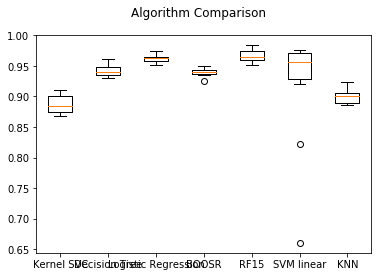

In [135]:
from matplotlib import pyplot
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [136]:
# prepare models
models_rf = []

In [137]:
models_rf.append(('RF4', RandomForestClassifier(n_estimators=500,max_depth=4, random_state=0)))
models_rf.append(('RF5', RandomForestClassifier(n_estimators=500,max_depth=5, random_state=0)))
models_rf.append(('RF6', RandomForestClassifier(n_estimators=500,max_depth=6, random_state=0)))
models_rf.append(('RF7', RandomForestClassifier(n_estimators=500,max_depth=7, random_state=0)))
models_rf.append(('RF8', RandomForestClassifier(n_estimators=500,max_depth=8, random_state=0)))
models_rf.append(('RF15', RandomForestClassifier(n_estimators=500,max_depth=15, random_state=0)))
models_rf.append(('RF20', RandomForestClassifier(n_estimators=500,max_depth=20, random_state=0)))
models_rf.append(('RF25', RandomForestClassifier(n_estimators=500,max_depth=25, random_state=0)))
models_rf.append(('RF30', RandomForestClassifier(n_estimators=500,max_depth=30, random_state=0)))
models_rf.append(('RF35', RandomForestClassifier(n_estimators=500,max_depth=35, random_state=0)))

In [138]:
results_rf = []
names_rf = []
scoring = 'accuracy'
for name, model in models_rf:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results_rf10 = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results_rf.append(cv_results_rf10)
    names_rf.append(name)
    msg = "%s: %f (%f)" % (name, cv_results_rf10.mean(), cv_results_rf10.std())
    print(msg)

RF4: 0.899000 (0.011841)
RF5: 0.926800 (0.012007)
RF6: 0.945400 (0.012587)
RF7: 0.953400 (0.012101)
RF8: 0.957600 (0.011723)
RF15: 0.966400 (0.009583)
RF20: 0.966200 (0.009734)
RF25: 0.966400 (0.009583)
RF30: 0.966400 (0.009583)
RF35: 0.966400 (0.009583)


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

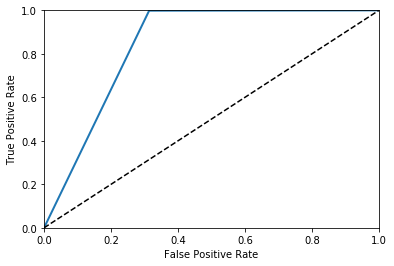

In [152]:
insta_rf15=RandomForestClassifier(n_estimators=500,max_depth=15, random_state=0)
insta_rf15.fit(X_train, y_train)
y_scores_rf15_cv5 = cross_val_predict(insta_rf15, X_train, y_train, cv=5)
fpr_rf15_cv5, tpr_rf15_cv5, thresholds_rf15_cv5 = roc_curve(y_train, y_scores_rf15_cv5)
def plot_roc_curve(fpr_rf15_cv5, tpr_rf15_cv5, label=None):
    plt.plot(fpr_rf15_cv5, tpr_rf15_cv5, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_rf15_cv5, tpr_rf15_cv5)
plt.show()

In [153]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_rf15_cv5)

0.8424122846820341

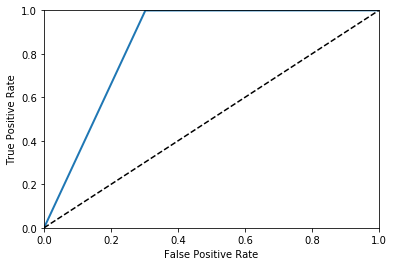

In [154]:
y_scores_rf15_cv10 = cross_val_predict(insta_rf15, X_train, y_train, cv=10)
fpr_rf15_cv10, tpr_rf15_cv10, thresholds_rf15_cv10 = roc_curve(y_train, y_scores_rf15_cv10)
def plot_roc_curve(fpr_rf15_cv10, tpr_rf15_cv10, label=None):
    plt.plot(fpr_rf15_cv10, tpr_rf15_cv10, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_rf15_cv10, tpr_rf15_cv10)
plt.show()

In [155]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_rf15_cv10)

0.8484773292227008

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500,max_depth=15, random_state=0)
rnd_clf.fit(X_train, y_train)


y_prob_rf = rnd_clf.predict_proba(X_test)

y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.958


In [161]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_rf))

0.9552401746724891


In [162]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred_rf))

0.9988584474885844


In [158]:
scores_precision = cross_val_score(rnd_clf, X_train, y_train, cv = 10, scoring='precision')
scores_precision

array([0.96476965, 0.97802198, 0.9673913 , 0.96216216, 0.94933333,
       0.95442359, 0.95956873, 0.96721311, 0.95687332, 0.97790055])

In [160]:
(0.96476965+0.97802198+0.9673913+ 0.96216216+0.94933333+0.95442359+0.95956873+0.96721311+0.95687332+0.97790055)/10

0.963765772

In [159]:
scores_recall= cross_val_score(rnd_clf, X_train, y_train, cv = 10, scoring='recall')
scores_recall

array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 0.9971831, 1.       , 0.9971831])

In [163]:
(1+1+1+1+1+1+1+1+0.9971831+0.9971831)/10

0.9994366200000002

No handles with labels found to put in legend.
/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


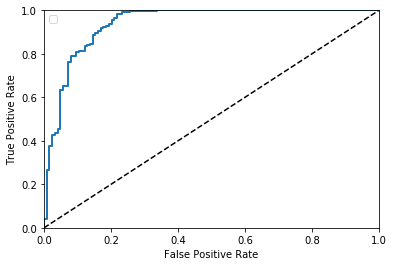

In [164]:
y_score_rf = y_prob_rf[:,1]
fpr_rf,tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)
# ROC curve plotting
def plot_roc_curve(fpr, tpr, lable=None):
    plt.plot(fpr,tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr_rf,tpr_rf)
plt.legend(loc="bottom right")
plt.show()